# ***ARIMA* stands for AutoRegressive Integrated Moving Average.**

**AR (Autoregression)** A model that uses the dependent relationship between an observation and some number of lagged observations. p is a parameter of how many lagged observations to be taken in.
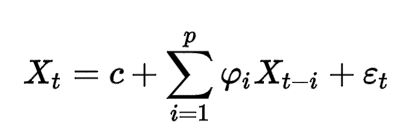

**I (Integrated)** A model that uses the differencing of raw observations (e.g. subtracting an observation from the previous time step). Differencing in statistics is a transformation applied to time-series data in order to make it stationary. This allows the properties do not depend on the time of observation, eliminating trend and seasonality and stabilizing the mean of the time series.
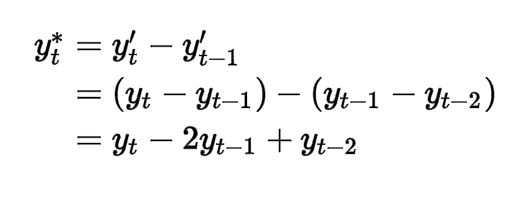

**MA (Moving Average)** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. q is a parameter of how many lagged observations to be taken in. Contrary to the AR model, the finite MA model is always stationary.
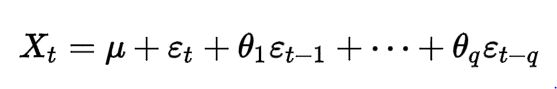

A non-seasonal ARIMA model can be (almost) completely summarized by three numbers:

**p (lag order)** the number of autoregressive terms

**d (degree of differencing)** the number of nonseasonal differences

**q (order of moving average)**  the number of moving-average terms

This is called ARIMA(p,d,q) model.

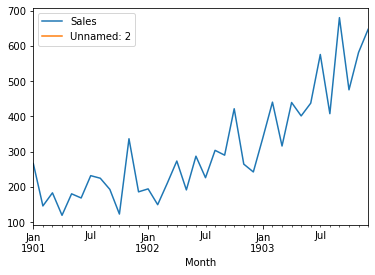

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
  
series = pd.read_csv('salesforecast.csv', \
                     header=0, \
                     parse_dates=[0], \
                     index_col=0, \
                     squeeze=True, \
                     date_parser=parser)

series.plot()
plt.show()

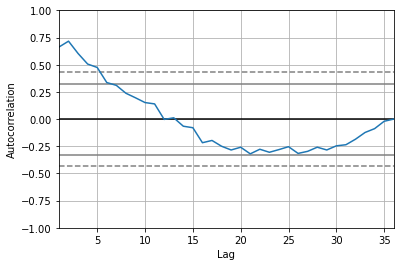

In [4]:
## Positive correlation above 0.50 for the first 5 lags. AR parameters p (lag order) 5 might be a good starting point.
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

In [30]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

<AxesSubplot:xlabel='Month'>

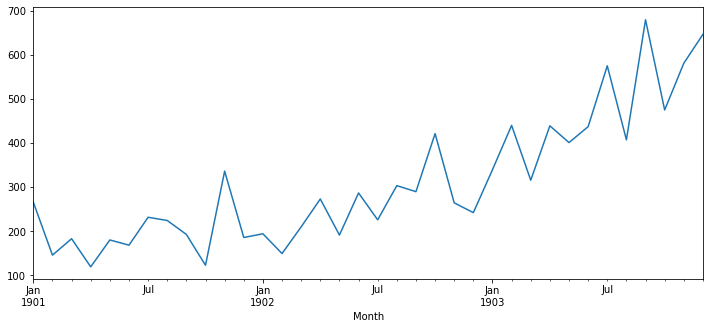

In [14]:
series['Sales'].plot(figsize=(12,5))

### Augmented Dickey-Fuller test (ADF)
ADF tests the null hypothesis that a unit root is present in time series sample. ADF statistic is a negative number and more negative it is the stronger the rejection of the hypothesis that there is a unit root.

***Null Hypotehsis (H0)*** If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

***Alternate Hypothesis (H1)*** The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary.

*p-value > 0.05* Accept H0, the data has a unit root and is non-stationary

*p-value ≤ 0.05* Reject H0. the data does not have a unit root and is stationary

## Check for stationarity
To interpret the test results, you only need to look at the p value. And you use the following simple method:

**If p< 0.05 ; Data is stationary**

**if p>0.05; Data is not stationary**

It’s not a hard and fast rule, but a stationary data should have a small p value. Larger p value could indicate presence of certain trends(varying mean) or seasonality as well.

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [18]:
adf_test(series['Sales'])

1. ADF :  3.7442381555522966
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 25
5. Critical Values :
	 1% :  -3.7238633119999998
	 5% :  -2.98648896
	 10% :  -2.6328004


In [19]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(series['Sales'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=431.042, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=412.612, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=411.169, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.396, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=408.229, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=409.976, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=415.148, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=410.183, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=412.058, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.542 seconds


C:\Users\Dishita Neve\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dishita Neve\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Dishita Neve\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
remov

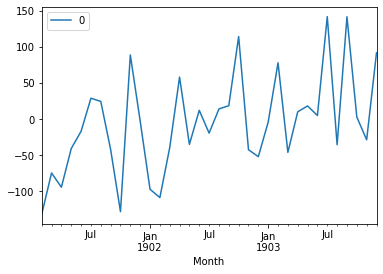

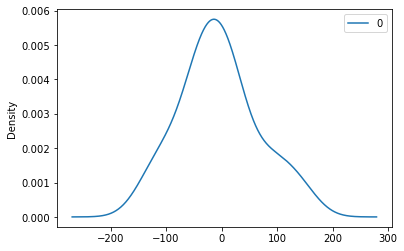

                0
count   35.000000
mean    -5.505126
std     69.978600
min   -132.196516
25%    -42.395580
50%     -4.181368
75%     21.540105
max    142.155148


In [26]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

# plot residual erros
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Conclusion from above :
-Residual does not seem to be stationary, meaning there seems to be an overall increase as time goes by. Prediction performance will depend on the time of observation.

-Residual seems to be Gaussian but slightly skewed to the left.

-Residual’s mean is non-zero suggesting that there is bias with the model prediction.

### Rolling Forecast

C:\Users\Dishita Neve\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=349.117642, expected=342.300000
predicted=306.512934, expected=339.700000
predicted=387.376355, expected=440.400000
predicted=348.154224, expected=315.900000
predicted=386.308736, expected=439.300000
predicted=356.082135, expected=401.300000
predicted=446.379499, expected=437.400000
predicted=394.737320, expected=575.500000
predicted=434.915519, expected=407.600000
predicted=507.923337, expected=682.000000
predicted=435.482976, expected=475.300000
predicted=652.743794, expected=581.300000
predicted=546.343410, expected=646.900000
Test MSE: 6958.329


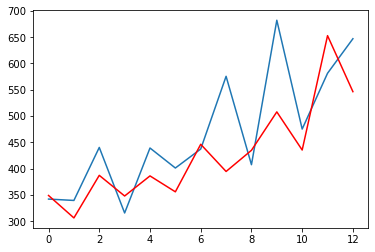

In [29]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()